In [2]:
from pathlib import Path
from micro_sam.util import get_cache_directory
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
from micro_sam.sample_data import fetch_hela_2d_example_data, fetch_livecell_example_data, fetch_wholeslide_example_data
from skimage.io import imread
import matplotlib.pyplot as plt

c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(443, 490)


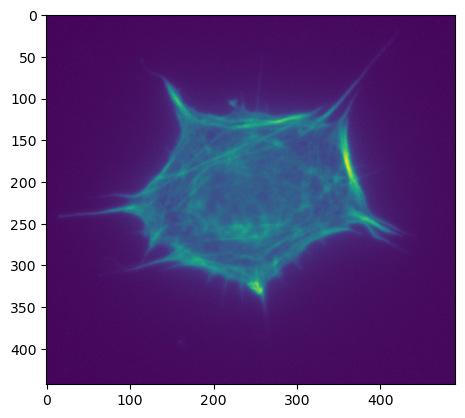

In [3]:
tnia_images_path = Path(r"D:/images/tnia-python-images")
#tnia_images_path = Path(r"/home/bnorthan/images/tnia-python-images/")
parent_path = tnia_images_path / "imagesc/2025_03_31_cellpose_not_precise"
im_name = 'Screenshot from 2025-03-31 10-28-06.png'
image = imread(parent_path / im_name)
plt.imshow(image)
print(image.shape)

image_normalized = image / 255.0


In [9]:
model_type = "vit_l_lm"

generate_kwargs = {
            "center_distance_threshold": 0.5,
            "boundary_distance_threshold": 0.5,
            "foreground_threshold": 0.5,
            "foreground_smoothing": 1.0,
            "distance_smoothing": 1.6,
            "min_size": 0,
            "output_mode": "binary_mask",
        }

predictor, segmenter = get_predictor_and_segmenter(
    model_type=model_type,
    checkpoint=None,  # Replace this with your custom checkpoint.
    amg=False,
    is_tiled=False,  # Switch to 'True' in case you would like to perform tiling-window based prediction.
)

segmentation = automatic_instance_segmentation(
    predictor=predictor,
    segmenter=segmenter,
    input_path=image,
    ndim=2,
    #tile_shape=(440,440),  # If you set 'is_tiled' in 'get_predictor_and_segmeter' to True, set a tile shape
    #halo=(10,10),  # If you set 'is_tiled' in 'get_predictor_and_segmeter' to True, set a halo shape.
    **generate_kwargs
)


100%|#####################################| 1.25G/1.25G [00:00<00:00, 1.35TB/s]
100%|#####################################| 44.1M/44.1M [00:00<00:00, 47.7GB/s]
Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]


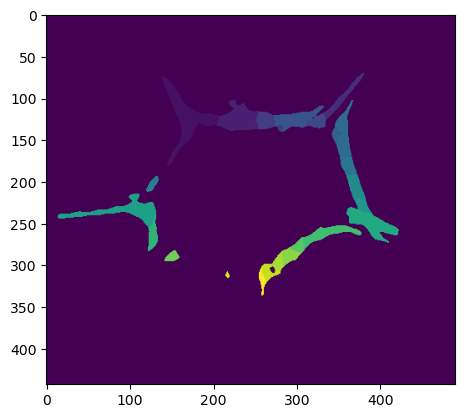

In [10]:
plt.imshow(segmentation)